In [1]:
using PyPlot

In [17]:
include("gaussian_field.jl")

run (generic function with 1 method)

In [19]:
begin 
    include("gaussian_field_test.jl")
end

Test Summary: | Pass  Total  Time
Fourier test  |    8      8  0.2s


Test.DefaultTestSet("Fourier test", Any[], 8, false, false, true, 1.746194171884618e9, 1.746194172096643e9, false, "/home/aponce04/Research/2025/ActiveMemory/Scripts/GaussianField/gaussian_field_test.jl")

In [4]:
params_1d = (
    L=8.,
    n=128, # Should be even
    tmax=10.,
    D=1.,
    r=1.,
    T=1.,
    k=1.,
    A=10.,
    σ=0.25,
    saveat=0.01,
)

(L = 8.0, n = 128, tmax = 10.0, D = 1.0, r = 1.0, T = 1.0, k = 1.0, A = 10.0, σ = 0.25, saveat = 0.01)

# Test Fourier stuff

In [10]:
xx, kk = fourier_xk(params_1d.L, params_1d.n);

In [11]:
gf = gaussian_fourier(kk; A=params_1d.A, σ=params_1d.σ)
g = custom_irfft(gf);
gs1 = custom_irfft(shift_fourier(gf, kk, 3.));
gs2 = custom_irfft(shift_fourier(gf, kk, -1.));

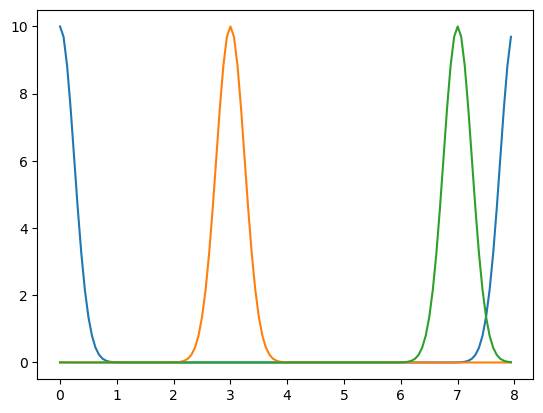

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x77dd0eb47e30>

In [12]:
plot(xx, g)
plot(xx, gs1)
plot(xx, gs2)

In [13]:
xx[2]-xx[1]

0.0625

In [14]:
2. * pi / (length(kk) * (kk[2]-kk[1]))

0.0625

# Test integration

In [18]:
@time sol = run(params_1d);

  6.046231 seconds (17.31 M allocations: 2.879 GiB, 5.22% gc time, 49.62% compilation time: <1% of which was recompilation)


In [20]:
skip = 1
tt = sol.t[1:skip:end]
traj = [s[end] for s in sol.u[1:skip:end]]
phif_sol = hcat(sol.u[1:skip:end]...)[1:end-1, :]
println(size(phif_sol))
phi_sol = hcat([custom_irfft(s[1:end-1]) for s in sol.u[1:skip:end]]...)
println(size(phi_sol))

(128, 1001)
(128, 1001)


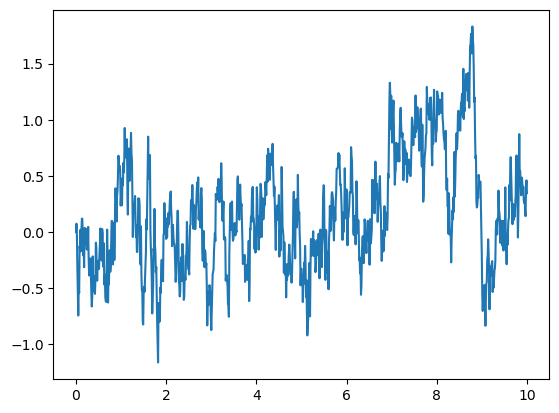

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x77dcc67018e0>

In [21]:
fig, ax = subplots()
ax.plot(tt, traj)

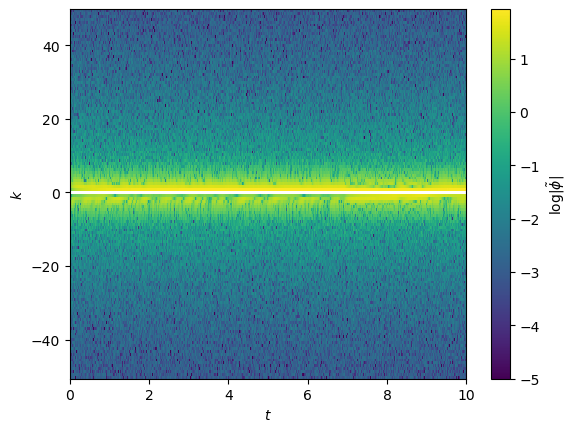

PyObject Text(25.000000000000007, 0.5, '$k$')

In [22]:
fig, ax = subplots()
p = ax.pcolormesh(tt, fftshift(kk), fftshift(log10.(abs.(phif_sol)), 1),
                  vmin=-5, cmap="viridis")
fig.colorbar(p, label=raw"$\log|\tilde\phi|$")
ax.set_xlabel(raw"$t$")
ax.set_ylabel(raw"$k$")

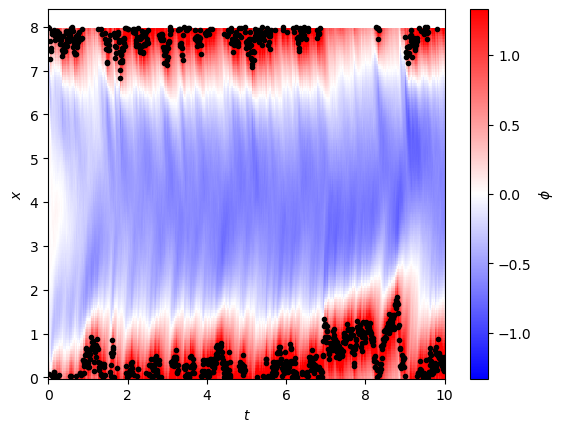

PyObject Text(24.000000000000007, 0.5, '$x$')

In [23]:
fig, ax = subplots()
vm = 0.75 * maximum(abs.(phi_sol))
p = ax.pcolormesh(tt, xx, phi_sol, vmin=-vm, vmax=vm, cmap="bwr")
ax.plot(tt, mod1.(traj, params_1d.L), "k.")
fig.colorbar(p, label=raw"$\phi$")
ax.set_xlabel(raw"$t$")
ax.set_ylabel(raw"$x$")

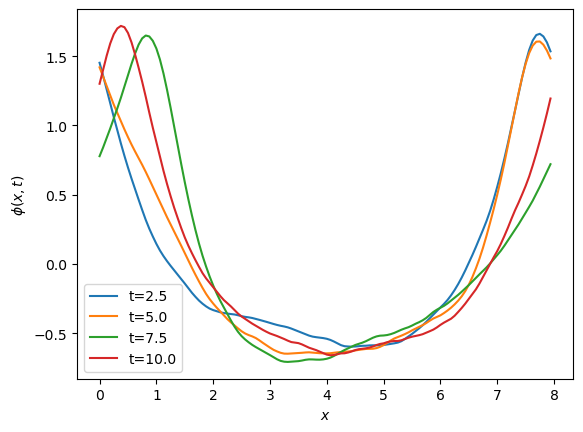

PyObject <matplotlib.legend.Legend object at 0x77dd21515cd0>

In [24]:
fig, ax = subplots()
for i in [251, 501, 751, 1001]
    ax.plot(xx, phi_sol[:, i], label="t=$(tt[i])")
end
ax.set_xlabel(raw"$x$")
ax.set_ylabel(raw"$\phi(x, t)$")
ax.legend()

In [25]:
sum(phi_sol[:, end])

2.220446049250313e-16